In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display


In [2]:
data_df = pd.read_excel("input_data.xlsx")

data_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


#### Droping the caller column

In [6]:
data_df1 = data_df.drop('Caller',axis=1)

#### Number of classes in the Assignment group

In [7]:
data_df1['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [8]:
len(data_df1['Assignment group'].unique())

74

In [10]:
df_assg = data_df1['Assignment group'].value_counts().reset_index()
df_assg['percentage'] = (df_assg['Assignment group']/df_assg['Assignment group'].sum())*100
df_assg.head()

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706


#### Visualize the percentage of incidents per assignment group

took from github

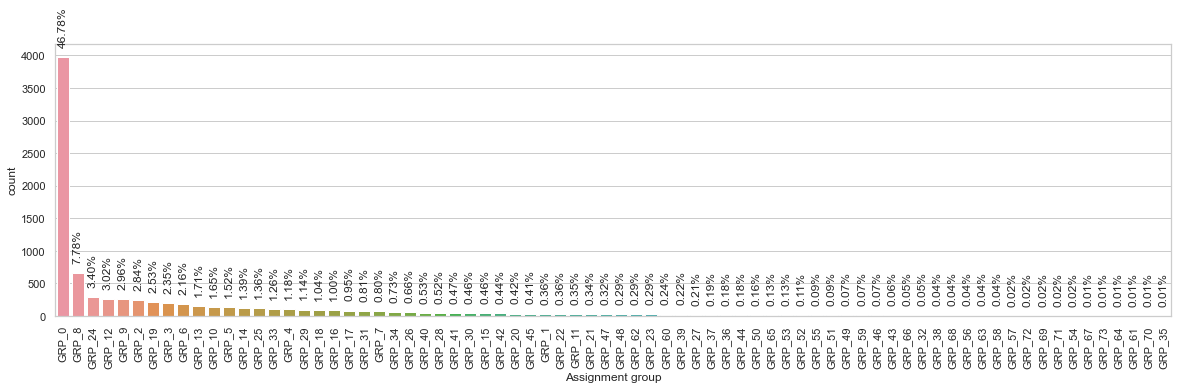

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.countplot(x="Assignment group", data=data_df1, order=data_df1["Assignment group"].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.annotate(str(format(p.get_height()/len(data_df1.index)*100, '.2f')+"%"), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', rotation=90, xytext = (0, 10), textcoords = 'offset points')

#### Top 20 Assignment groups with highest number of tickets

In [13]:
df_top_assg = data_df1['Assignment group'].value_counts().nlargest(20).reset_index()
df_top_assg

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


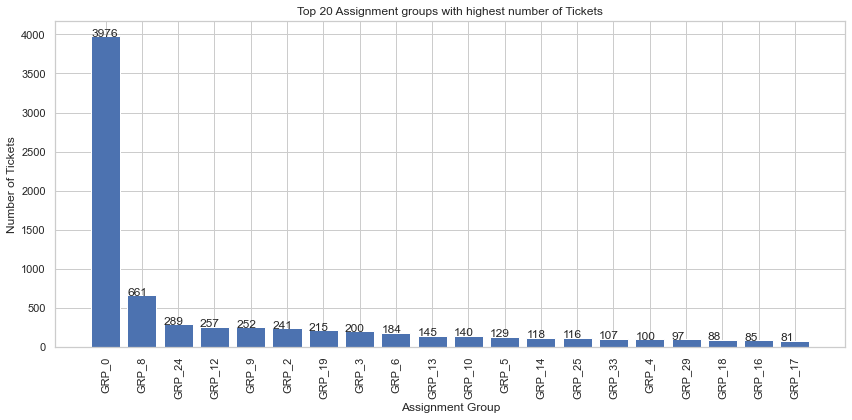

In [14]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_assg['index'],df_top_assg['Assignment group'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

#### Bottom 20 Assignment groups with less number of tickets

In [15]:
df_bottom_assg = data_df1['Assignment group'].value_counts().nsmallest(20).reset_index()
df_bottom_assg

,index,Assignment group
0,GRP_67,1
1,GRP_73,1
2,GRP_64,1
3,GRP_61,1
4,GRP_70,1
5,GRP_35,1
6,GRP_57,2
7,GRP_72,2
8,GRP_69,2
9,GRP_71,2


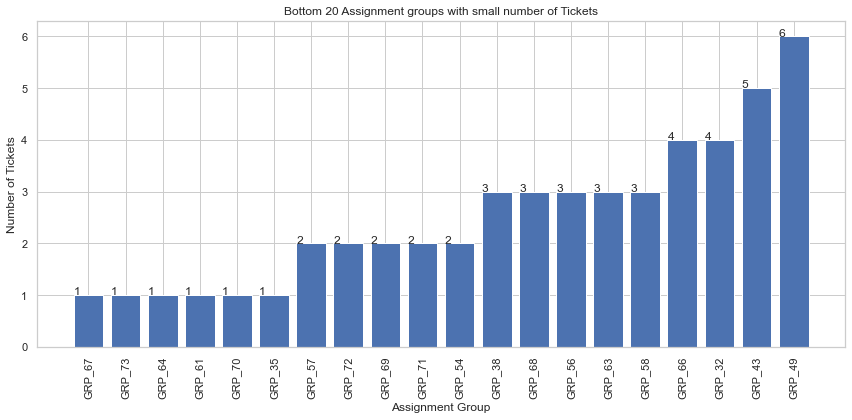

In [16]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_assg['index'],df_bottom_assg['Assignment group'])
plt.title('Bottom 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

#### Distribution of tickets counts in various bins

In [21]:
df_tickets = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1','Ticket Count':len(df_assg[df_assg['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 1)& (df_assg['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 5)& (df_assg['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 10)& (df_assg['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 20)& (df_assg['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 50)& (df_assg['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100',
              'Ticket Count':len(df_assg[(df_assg['Assignment group'] > 100)])}
#append row to the dataframe
df_tickets = df_tickets.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_tickets

,Description,Ticket Count
0,1,6
1,2-5,13
2,6-10,6
3,11-20,9
4,21-50,16
5,51-100,9
6,>100,15


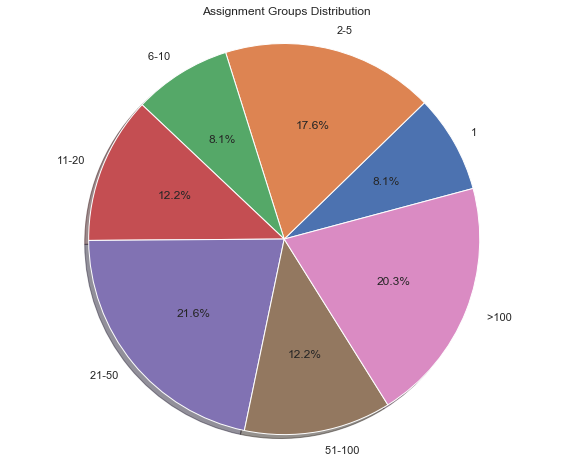

In [22]:
plt.figure(figsize=(10, 8))
plt.pie(df_tickets['Ticket Count'],labels=df_tickets['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

#### Missing Values

In [23]:
data_df1[data_df1['Short description'].isnull()]

,Short description,Description,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,GRP_0


In [24]:
data_df1[data_df1['Description'].isnull()]

,Short description,Description,Assignment group
4395,i am locked out of skype,NaN,GRP_0


In [25]:
#Replace NaN values in Short Description and Description columns
data_df1['Short description'] = data_df1['Short description'].replace(np.nan, '', regex=True)
data_df1['Description'] = data_df1['Description'].replace(np.nan, '', regex=True)

In [27]:
#Concatenate Short Description and Description columns
data_df1['New_Description'] = data_df1['Short description'] + ' ' + data_df1['Description']

#### Analysing language

In [28]:
#Lets encode the string, to make it easier to be passed to language detection api.
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8") 

data_df1['New_Description'] = data_df1['New_Description'].apply(fn_decode_to_ascii)

In [ ]:
pip install langdetect

- copied from github

In [29]:
from langdetect import detect
    
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'                                                  

data_df1['language'] = data_df1['New_Description'].apply(fn_lan_detect)

In [30]:
data_df1["language"].value_counts()

en    7098
de     382
af     288
it     134
fr     108
no     100
nl      66
es      52
sv      52
ca      47
da      32
pl      29
tl      17
pt      16
sl      13
ro      12
cy      12
sq       8
hr       7
so       5
id       5
fi       4
et       4
cs       3
sk       2
lt       2
lv       1
vi       1
Name: language, dtype: int64

C:\Users\user\Anaconda3\envs\tensorflow-sessions\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


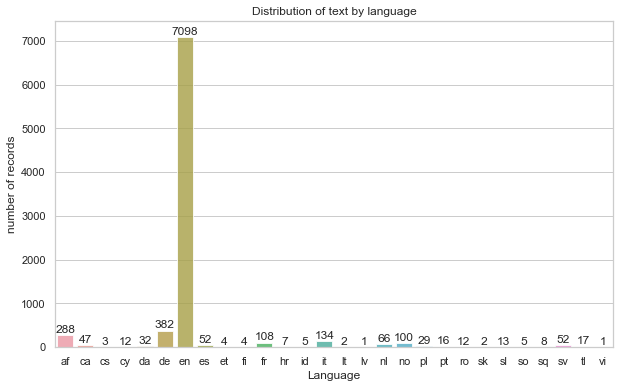

In [31]:
x = data_df1["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [ ]:
pip install googletrans

In [32]:
import googletrans
from googletrans import Translator
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

#### Translate text to English

In [33]:
# Function to translate the text to english.
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df

In [34]:
data_df1['English_Description'] = data_df1.apply(lambda x: fn_translate(x['New_Description'], x['language']), axis=1)

In [35]:
data_df1.head()

,Short description,Description,Assignment group,New_Description,language,English_Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,en,login issue -verified user details.(employee# ...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,en,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...,en,cant log in to vpn \r\n\r\nreceived from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...,en,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,skype error skype error,no,skype error skype error


#### Data Cleaning

In [36]:
trans_df = data_df1.drop(['Short description','Description','New_Description'],axis=1)
trans_df.English_Description=trans_df.English_Description.astype(str)
trans_df.head()

,Assignment group,language,English_Description
0,GRP_0,en,login issue -verified user details.(employee# ...
1,GRP_0,en,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,GRP_0,en,cant log in to vpn \r\n\r\nreceived from: eylq...
3,GRP_0,en,unable to access hr_tool page unable to access...
4,GRP_0,no,skype error skype error


In [37]:
import string
import re
from collections import Counter
from nltk.corpus import stopwords

- copied form github

In [38]:
### Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.replace(('first name: ').lower(),'firstname')
    text=text.replace(('last name: ').lower(),'lastname')
    text=text.replace(('received from:').lower(),'')
    text=text.replace('email:','')
    text=text.replace('email address:','') 
    index1=text.find('from:')
    index2=text.find('\nsddubject:')
    text=text.replace(text[index1:index2],'')
    index3=text.find('[cid:image')
    index4=text.find(']')
    text=text.replace(text[index3:index4],'')
    text=text.replace('subject:','')
    text=text.replace('received from:','')
    text=text.replace('this message was sent from an unmonitored email address', '')
    text=text.replace('please do not reply to this message', '')
    text=text.replace('monitoring_tool@company.com','MonitoringTool')
    text=text.replace('select the following link to view the disclaimer in an alternate language','')
    text=text.replace('description problem', '') 
    text=text.replace('steps taken far', '')
    text=text.replace('customer job title', '')
    text=text.replace('sales engineer contact', '')
    text=text.replace('description of problem:', '')
    text=text.replace('steps taken so far', '')
    text=text.replace('please do the needful', '')
    text=text.replace('please note that ', '')
    text=text.replace('please find below', '')
    text=text.replace('date and time', '')
    text=text.replace('kindly refer mail', '')
    text=text.replace('name:', '')
    text=text.replace('language:', '')
    text=text.replace('customer number:', '')
    text=text.replace('telephone:', '')
    text=text.replace('summary:', '')
    text=text.replace('sincerely', '')
    text=text.replace('company inc', '')
    text=text.replace('importance:', '')
    text=text.replace('gmail.com', '')
    text=text.replace('company.com', '')
    text=text.replace('microsoftonline.com', '')
    text=text.replace('company.onmicrosoft.com', '')
    text=text.replace('hello', '')
    text=text.replace('hallo', '')
    text=text.replace('hi it team', '')
    text=text.replace('hi team', '')
    text=text.replace('hi', '')
    text=text.replace('best', '')
    text=text.replace('kind', '')
    text=text.replace('regards', '')
    text=text.replace('good morning', '')
    text=text.replace('please', '')
    text=text.replace('regards', '')

    text = re.sub(r'\S+@\S+', '', text)
    custom_punctuation='!"#$%&\'()*+,-./:;<=>?@[\\]^`{|}~'
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\r\n', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\S+@\S+', '', text)

    text = text.lower()
    return text

In [39]:
trans_df['cleaned_description'] = trans_df['English_Description'].apply(lambda x: clean_text(x))
trans_df.drop(['English_Description'],axis=1,inplace=True)

In [40]:
trans_df['cleaned_description'].head()

0    login issue verified user detailsemployee  man...
1    outlook  hmjdrvpbkomuaywn teammy meetingsskype...
2    cant log in to vpn  eylqgodmybqkwiami cannot l...
3    unable to access hrtool page unable to access ...
4                            skype error  skype error 
Name: cleaned_description, dtype: object

#### Removing Stop Words

In [41]:
import nltk
#from nltk.corpus import stopwords
#nltk.download('stopwords')
#stopwords = stopwords.words('english')

In [42]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
trans_df['cleaned_description'] = trans_df['cleaned_description'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
trans_df['cleaned_description'].head()

0    login issue verified user detailsemployee mana...
1    outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2        cant log vpn eylqgodmybqkwiami cannot log vpn
3    unable access hrtool page unable access hrtool...
4                              skype error skype error
Name: cleaned_description, dtype: object

In [ ]:
pip install -U textblob

In [43]:
from textblob import Word
trans_df['cleaned_description']= trans_df['cleaned_description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in str(x).split()]))
trans_df['cleaned_description'].head()

0    login issue verified user detailsemployee mana...
1    outlook hmjdrvpbkomuaywn teammy meetingsskype ...
2        cant log vpn eylqgodmybqkwiami cannot log vpn
3    unable access hrtool page unable access hrtool...
4                              skype error skype error
Name: cleaned_description, dtype: object

#### Mean of words in each ticket, and the longest and shortest description in our data set

In [44]:
trans_df['num_wds'] = trans_df['cleaned_description'].apply(lambda x: len(x.split()))
trans_df['num_wds'].mean()

17.341882352941177

In [45]:
print(trans_df['num_wds'].max())
print(trans_df['num_wds'].min())

620
0


In [46]:
len(trans_df[trans_df['num_wds']==0])

46

#### Number of unique words in each article

In [47]:
trans_df['uniq_wds'] = trans_df['cleaned_description'].str.split().apply(lambda x: len(set(x)))
trans_df['uniq_wds'].head()

0    16
1    12
2     5
3     4
4     2
Name: uniq_wds, dtype: int64

#### Mean Number of Words in tickets per Assignment Group

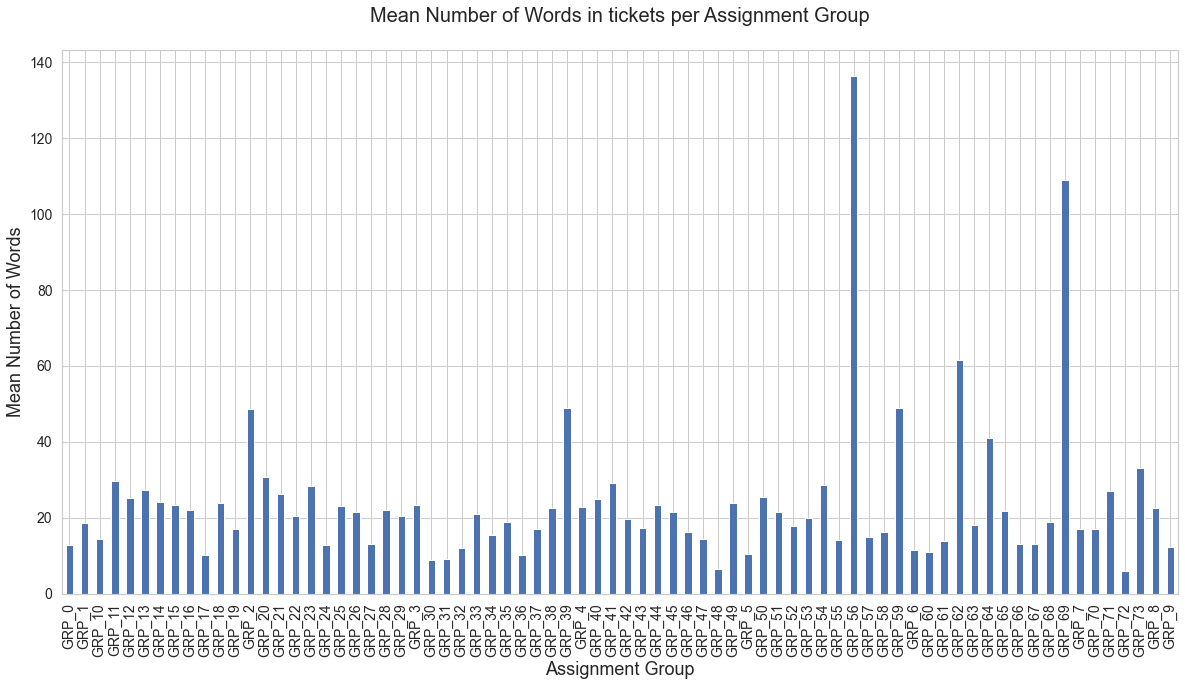

In [48]:
assign_grps = trans_df.groupby('Assignment group')
ax=assign_grps['num_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Words in tickets per Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

#### Mean Number of Unique Words in tickets per Assignment Group

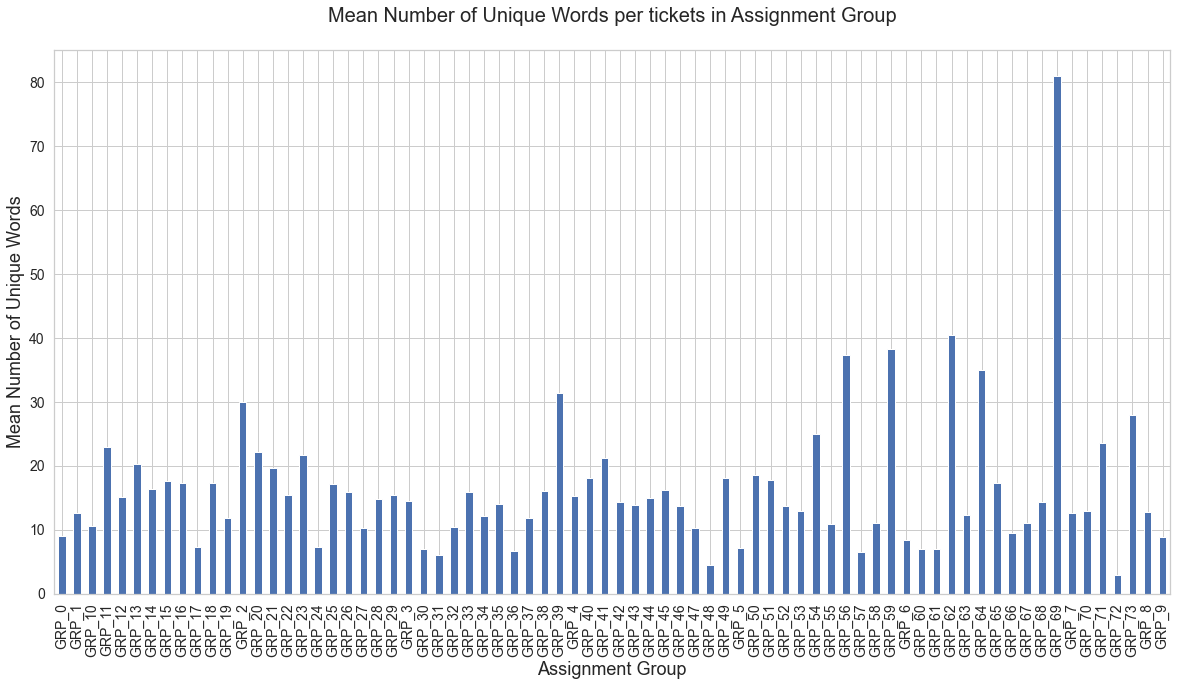

In [49]:
ax=assign_grps['uniq_wds'].aggregate(np.mean).plot(kind='bar', fontsize=14, figsize=(20,10))
ax.set_title('Mean Number of Unique Words per tickets in Assignment Group\n', fontsize=20)
ax.set_ylabel('Mean Number of Unique Words', fontsize=18)
ax.set_xlabel('Assignment Group', fontsize=18);

#### Most common words over the entire corpus

In [51]:
word_counts = Counter()
for i, row in trans_df.iterrows():
    word_counts.update(row['cleaned_description'].split())
    
word_counts.most_common(20)

[('password', 2047),
 ('erp', 1935),
 ('jobscheduler', 1915),
 ('failed', 1706),
 ('yesnona', 1568),
 ('unable', 1474),
 ('reset', 1422),
 ('user', 1400),
 ('t', 1254),
 ('issue', 1223),
 ('job', 1219),
 ('account', 1196),
 ('access', 1085),
 ('error', 957),
 ('need', 870),
 ('outlook', 857),
 ('ticket', 841),
 ('company', 840),
 ('working', 813),
 ('site', 793)]

### Tokenization

In [52]:
import nltk
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
trans_df['token_desc'] = trans_df['cleaned_description'].apply(lambda x: tokenizer.tokenize(x))

In [53]:
trans_df['token_desc'].head()

0    [login, issue, verified, user, detailsemployee...
1    [outlook, hmjdrvpbkomuaywn, teammy, meetingssk...
2    [cant, log, vpn, eylqgodmybqkwiami, cannot, lo...
3    [unable, access, hrtool, page, unable, access,...
4                         [skype, error, skype, error]
Name: token_desc, dtype: object

In [54]:
# After preprocessing, the text format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [55]:
trans_df['token_desc'] = trans_df['token_desc'].apply(lambda x : combine_text(x))

In [56]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Assignment group     8500 non-null   object
 1   language             8500 non-null   object
 2   cleaned_description  8500 non-null   object
 3   num_wds              8500 non-null   int64 
 4   uniq_wds             8500 non-null   int64 
 5   token_desc           8500 non-null   object
dtypes: int64(2), object(4)
memory usage: 398.6+ KB
